In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=67)

In [26]:
model_overfit = DecisionTreeClassifier()
model_overfit.fit(X_train,y_train)
model_overfit.score(X_test,y_test)

0.82

In [27]:
model_overfit.score(X_train,y_train)

0.9966666666666667

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
models = {'LogisticReg':LogisticRegression(),'KNN_classifier':KNeighborsClassifier(),
          'SVM_lin':SVC(kernel='linear'),'SVM_poly':SVC(kernel='poly'),'SVM_rbf':SVC(kernel='rbf')}

In [24]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    print(name,'\t',round(model.score(X_train_scaled,y_train),2),model.score(X_test_scaled,y_test))

LogisticReg 	 0.82 0.77
KNN_classifier 	 0.91 0.9
SVM_lin 	 0.84 0.77
SVM_poly 	 0.9 0.91
SVM_rbf 	 0.91 0.9


In [28]:
model_reg = DecisionTreeClassifier(min_samples_leaf=3, max_depth=3)
model_reg.fit(X_train,y_train)
model_reg.score(X_train,y_train), model.score(X_test,y_test)

(0.9, 0.92)

In [29]:
# Plotting Decision boundary

In [30]:
min_age, min_sal = X_train['Age'].min(), X_train['EstimatedSalary'].min()
max_age, max_sal = X_train['Age'].max(), X_train['EstimatedSalary'].max()

In [32]:
import numpy as np

In [34]:
ages = np.linspace(min_age,max_age,100)
sals = np.linspace(min_sal,max_sal,100)

In [36]:
data = []
for age in ages:
    for sal in sals:
        data.append([age,sal])
data = np.array(data)
data.shape

(10000, 2)

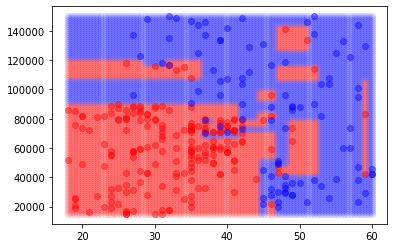

In [43]:
y_p = model_overfit.predict(data)
class_0 = data[y_p==0]
class_1 = data[y_p==1]
plt.scatter(class_0[:,0], class_0[:,1], c='red', alpha=0.1)
plt.scatter(class_1[:,0], class_1[:,1], c='blue', alpha=0.1)

class_0 = X_train[y_train==0]
class_1 = X_train[y_train==1]
plt.scatter(class_0['Age'], class_0['EstimatedSalary'], c='red', alpha=.4)
plt.scatter(class_1['Age'], class_1['EstimatedSalary'], c='blue',alpha=0.4)

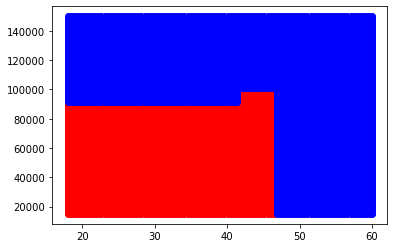

In [38]:
y_p = model_reg.predict(data)
class_0 = data[y_p==0]
class_1 = data[y_p==1]
plt.scatter(class_0[:,0], class_0[:,1], c='red')
plt.scatter(class_1[:,0], class_1[:,1], c='blue')